In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data = pd.read_csv('penguins_lter.csv', sep=';')
data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [78]:
data.describe(include="all")

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
count,344,344.000000,344,344,344,344,344,344,344,342.000000,342.000000,342.000000,342.000000,333,330.000000,331.000000,26
unique,3,NaN,3,1,3,1,190,2,50,NaN,NaN,NaN,NaN,2,NaN,NaN,7
top,PAL0910,NaN,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N61A2,Yes,11/27/07,NaN,NaN,NaN,NaN,MALE,NaN,NaN,Nest never observed with full clutch.
freq,120,NaN,152,344,168,344,3,308,18,NaN,NaN,NaN,NaN,168,NaN,NaN,13
mean,NaN,63.151163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,8.733382,-25.686292,NaN
std,NaN,40.430199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.551770,0.793961,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,7.632200,-27.018540,NaN
25%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,8.299890,-26.320305,NaN
50%,NaN,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,8.652405,-25.833520,NaN
75%,NaN,95.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,9.172123,-25.062050,NaN


Total data tuples:  344
studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64


<Axes: >

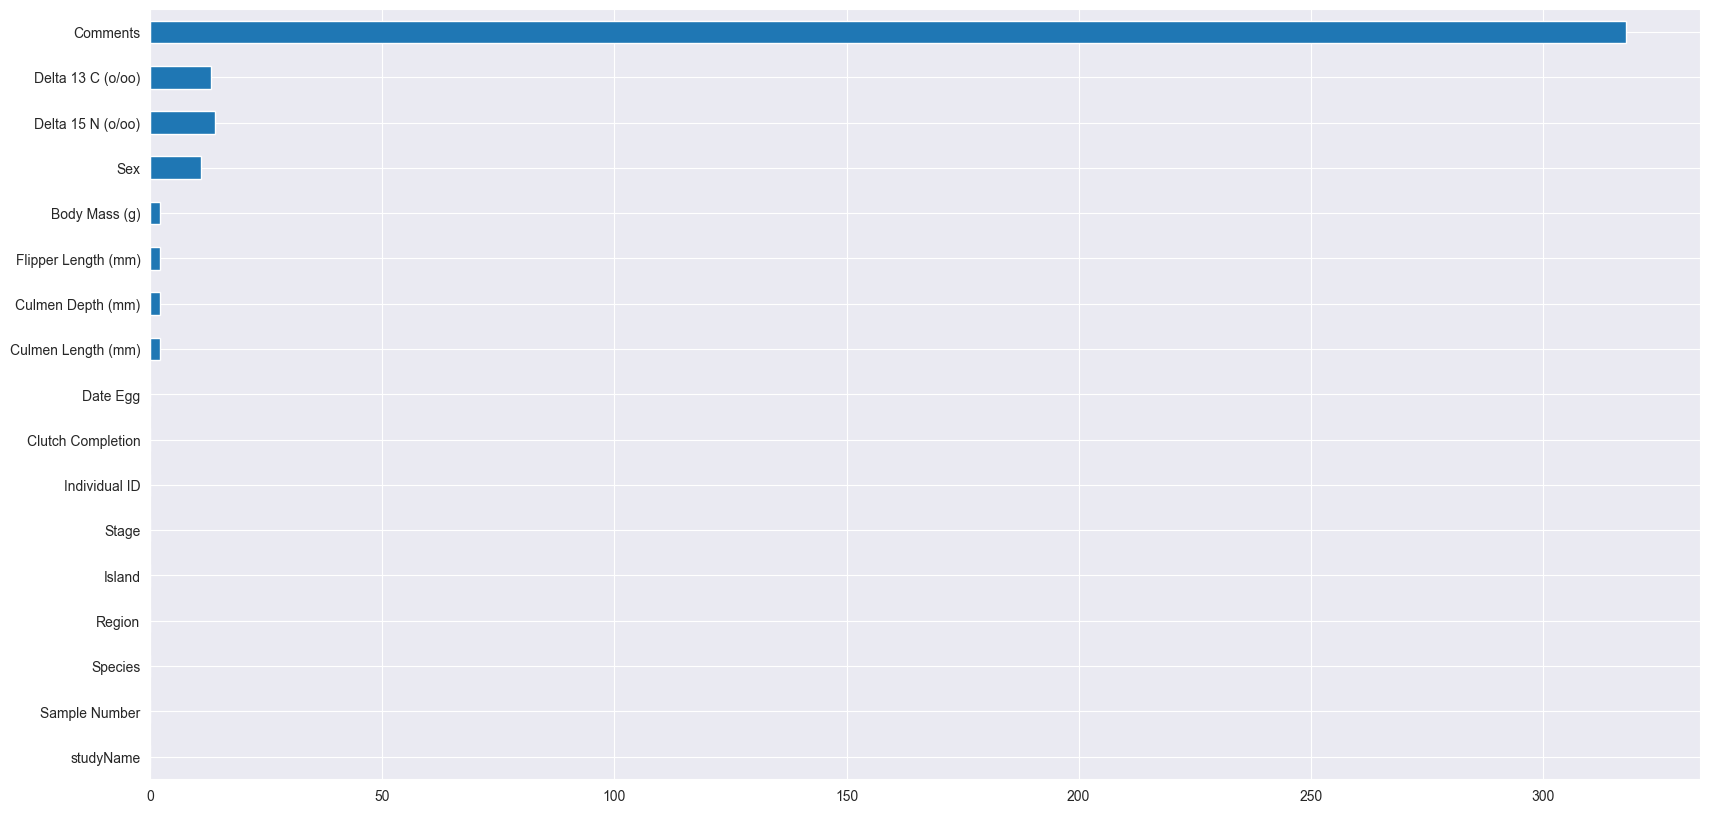

In [79]:
print("Total data tuples: ", data.shape[0])

print(data.isna().sum())
data.isna().sum().plot(kind="barh", figsize=(20,10))

In [80]:
# Daten vorbereiten, bereinigen
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data["Culmen Length (mm)"] = imp.fit_transform(data[["Culmen Length (mm)"]])
data["Culmen Depth (mm)"] = imp.fit_transform(data[["Culmen Depth (mm)"]])
data["Flipper Length (mm)"] = imp.fit_transform(data[["Flipper Length (mm)"]])
data["Body Mass (g)"] = imp.fit_transform(data[["Body Mass (g)"]])
data["Delta 13 C (o/oo)"] = imp.fit_transform(data[["Delta 13 C (o/oo)"]])
data["Delta 15 N (o/oo)"] = imp.fit_transform(data[["Delta 15 N (o/oo)"]])

data.loc[data["Sex"] == "MALE","Sex"] = 0
data.loc[data["Sex"] == "FEMALE","Sex"] = 1
data['Sex'] = data['Sex'].fillna(data['Sex'].mean().astype(int))
data.info(verbose=True)

data['Clutch_Completion_Label'] = label_encoder.fit_transform(data['Clutch Completion'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   344 non-null    float64
 10  Culmen Depth (mm)    344 non-null    float64
 11  Flipper Length (mm)  344 non-null    float64
 12  Body Mass (g)        344 non-null    float64
 13  Sex                  344 non-null    int64  
 14  Delta 15 N (o/oo)    344 non-null    float64
 15  Delta 13 C (o/oo)    344 non-null    flo

In [81]:
data = data.drop("Comments", axis='columns')
print(data.isna().sum())

studyName                  0
Sample Number              0
Species                    0
Region                     0
Island                     0
Stage                      0
Individual ID              0
Clutch Completion          0
Date Egg                   0
Culmen Length (mm)         0
Culmen Depth (mm)          0
Flipper Length (mm)        0
Body Mass (g)              0
Sex                        0
Delta 15 N (o/oo)          0
Delta 13 C (o/oo)          0
Clutch_Completion_Label    0
dtype: int64


                                     Species  Count
0        Adelie Penguin (Pygoscelis adeliae)    152
1  Chinstrap penguin (Pygoscelis antarctica)     68
2          Gentoo penguin (Pygoscelis papua)    124


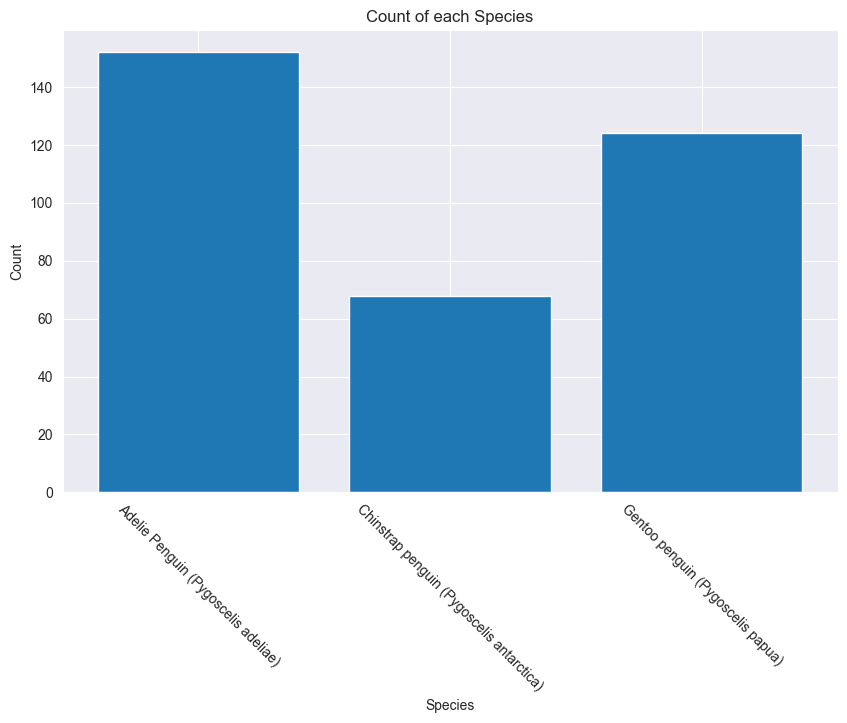

In [82]:
# Verteilung von Species
data['Species_Label'] = label_encoder.fit_transform(data['Species'])

grouped_data = data.groupby('Species').size().reset_index(name='Count')

print(grouped_data)

plt.figure(figsize=(10, 6))
# Plot the result
plt.bar(grouped_data['Species'], grouped_data['Count'])
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of each Species')
plt.xticks(rotation=-45)
plt.show()

   Sex  Sex Count
0    0        179
1    1        165


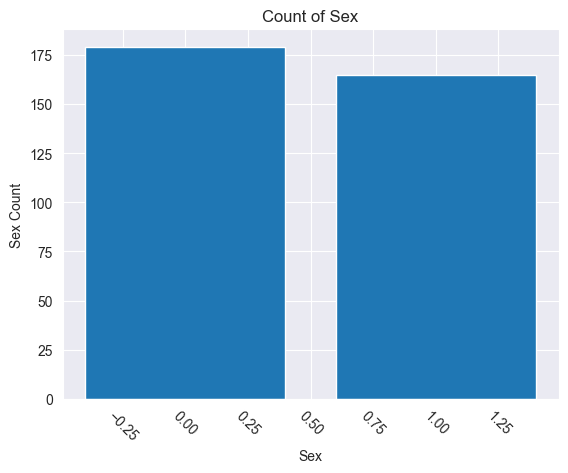

In [83]:

grouped_data = data.groupby('Sex').size().reset_index(name='Sex Count')

print(grouped_data)
# Plot the result
plt.bar(grouped_data['Sex'], grouped_data['Sex Count'])
plt.xlabel('Sex')
plt.ylabel('Sex Count')
plt.title('Count of Sex')
plt.xticks(rotation=-45)
plt.show()

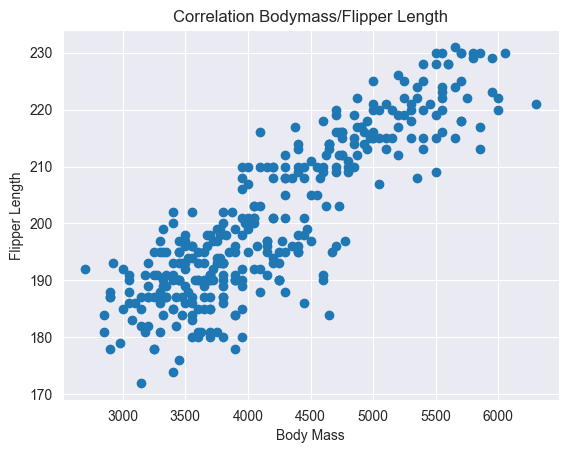

In [84]:
# Correlation btw Bodymass and Flipper Length
plt.scatter(data["Body Mass (g)"], data["Flipper Length (mm)"])
plt.xlabel('Body Mass')
plt.ylabel('Flipper Length')
plt.title('Correlation Bodymass/Flipper Length')
plt.show()

   Region  Region_Count
0  Anvers           344


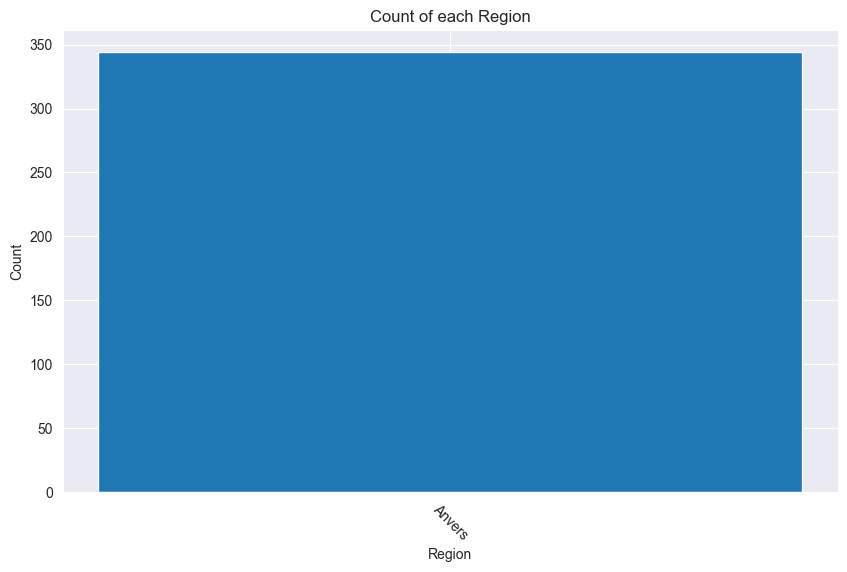

In [85]:
# Verteilung von Species
grouped_data = data.groupby('Region').size().reset_index(name='Region_Count')

print(grouped_data)

plt.figure(figsize=(10, 6))
# Plot the result
plt.bar(grouped_data['Region'], grouped_data['Region_Count'])
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count of each Region')
plt.xticks(rotation=-45)
plt.show()

      Island  Island_Count
0     Biscoe           168
1      Dream           124
2  Torgersen            52


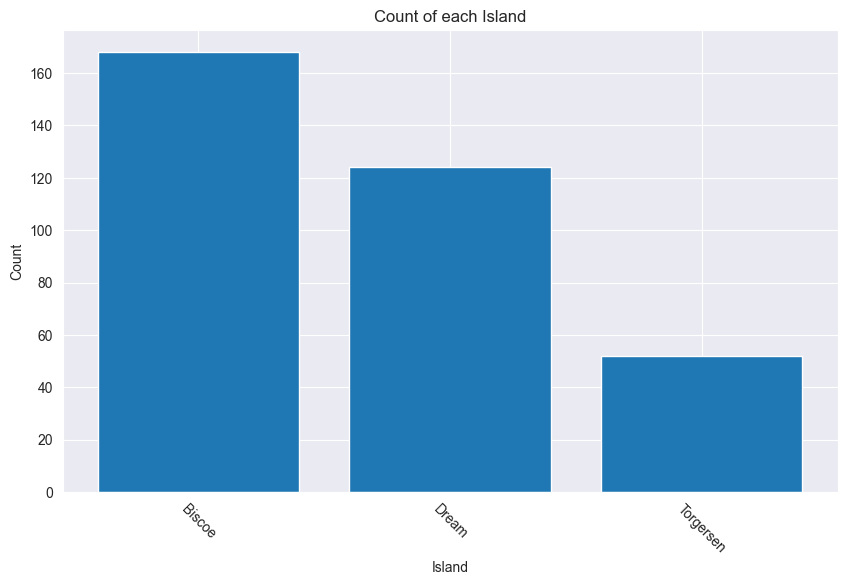

In [86]:
data['Island_Label'] = label_encoder.fit_transform(data['Island'])

grouped_data = data.groupby('Island').size().reset_index(name='Island_Count')

print(grouped_data)

plt.figure(figsize=(10, 6))
# Plot the result
plt.bar(grouped_data['Island'], grouped_data['Island_Count'])
plt.xlabel('Island')
plt.ylabel('Count')
plt.title('Count of each Island')
plt.xticks(rotation=-45)
plt.show()

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

features =  ["Island_Label", "Clutch_Completion_Label", "Sex", "Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]

data['Species_Label'] = label_encoder.fit_transform(data['Species'])

columns_to_drop = ['studyName', 'Sample Number', 'Date Egg', 'Individual ID', 'Region', 'Island', 'Stage', 'Clutch Completion', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
data = data.drop(columns=columns_to_drop)

X_train, test_input, Y_train, test_output = train_test_split(data.drop("Species", axis=1), data["Species_Label"], test_size=0.5)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(test_input)

output = pd.DataFrame({'Species': predictions, 'Actual Species': test_output})
output.to_csv('result.csv')


Confusion Matrix:
[[66  6  7]
 [ 7 27  4]
 [ 3  0 52]]


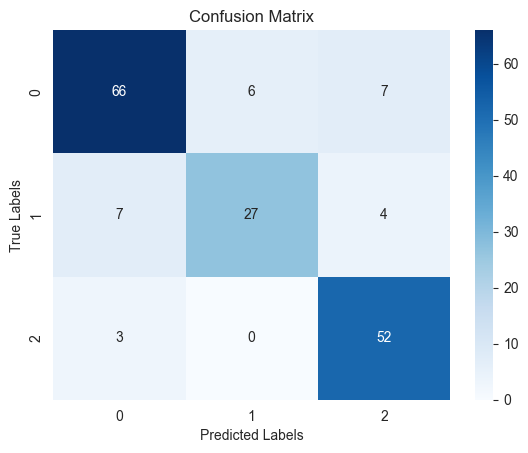

In [88]:
from sklearn.svm import NuSVC
from sklearn.metrics import confusion_matrix
import seaborn as sns

svm = NuSVC()
svm.fit(X_train, Y_train)
svm_pred = svm.predict(test_input)

cm = confusion_matrix(test_output, svm_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()